In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [56]:
df=pd.read_csv("stockdata.csv")

In [57]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [58]:
df.shape

(1250, 9)

In [59]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [61]:
df.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [62]:
corrMatrix = df.iloc[:, 1:8].corr()
corrMatrix

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


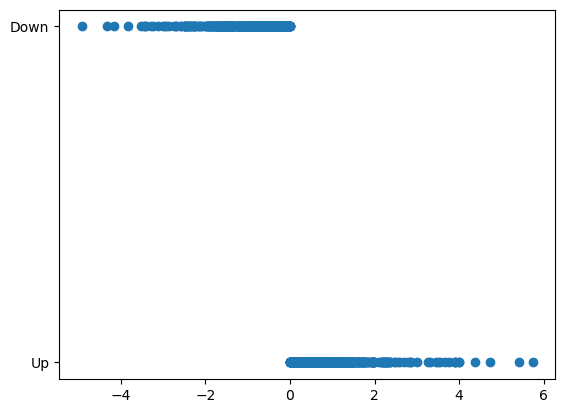

In [63]:
plt.scatter(df.Today,Smarket.Direction)

In [ ]:
import matplotlib.pyplot as plt
dataloan=df.LoanAmount
q1=np.percentile(dataloan,25)
q3=np.percentile(dataloan,75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
outliers=[x for x in dataloan if x <lb or x>ub]
plt.figure(figsize=(8,6))
plt.boxplot(dataloan,vert=True,patch_artist=True,notch=True)
plt.show()

In [ ]:
median = df.loc[df['LoanAmount']<300, 'LoanAmount'].median()
df["LoanAmount"] = np.where(df["LoanAmount"] >300, median,df['LoanAmount'])

In [ ]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [66]:
dircnt=df['Direction'].value_counts()

Text(0, 0.5, 'Number Of Occurrences')

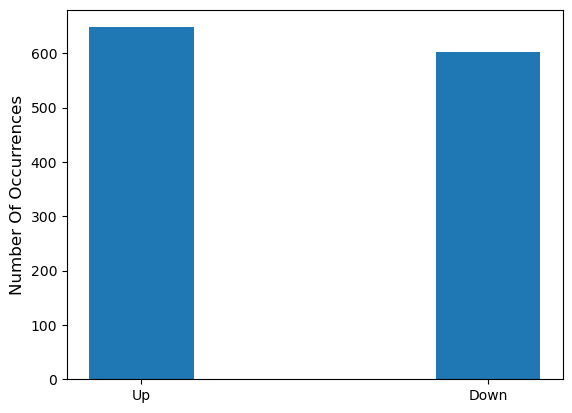

In [68]:
plt.bar(list(dircnt.index), list(dircnt.values) ,  width=0.3)
plt.ylabel('Number Of Occurrences', fontsize=12)

In [102]:
X=df.loc[:,'Lag1':'Today']
Y=df.loc[:,'Direction']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [103]:
classifierl = LogisticRegression()
classifierl.fit(X_train,Y_train)

LogisticRegression()

In [104]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [105]:
classifier.score(X_test,Y_test)

0.984